In [1]:
import duckdb
import pandas as pd
# No need to import duckdb_engine
#  jupysql will auto-detect the driver needed based on the connection string!

# Import jupysql Jupyter extension to create SQL cells
output_df = None

In [2]:
%load_ext sql

In [3]:
%sql duckdb:///:memory:

Connecting to 'duckdb:///:memory:'

In [4]:
%sql SELECT 'Off and flying!' AS a_duckdb_column

Running query in 'duckdb:///:memory:'

a_duckdb_column
Off and flying!


In [5]:
%load_ext sql
conn = duckdb.connect()
%sql conn --alias duckdb

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


```sql
SELECT
    schema_name,
    function_name
FROM duckdb_functions()
ORDER BY ALL DESC
LIMIT 500;
```

In [6]:
%%sql
SELECT
    schema_name,
    function_name
FROM duckdb_functions()
ORDER BY ALL DESC
LIMIT 500;

Running query in 'duckdb'

schema_name,function_name
pg_catalog,shobj_description
pg_catalog,shobj_description
pg_catalog,shobj_description
pg_catalog,pg_typeof
pg_catalog,pg_typeof
pg_catalog,pg_typeof
pg_catalog,pg_type_is_visible
pg_catalog,pg_type_is_visible
pg_catalog,pg_type_is_visible
pg_catalog,pg_ts_template_is_visible


In [7]:
input_df = pd.DataFrame.from_dict({"i": [1, 2, 3], "j": ["one", "two", "three"]})

In [8]:
%sql output_df << SELECT sum(i) AS total_i FROM input_df

Running query in 'duckdb'

In [9]:
output_df

total_i
6


In [10]:
%%sql
INSTALL httpfs;
LOAD httpfs;

Running query in 'duckdb'

Success


<Axes: title={'center': "'trip_distance' from 'trip-data/yellow_tripdata_2021-01.parquet'"}, ylabel='trip_distance'>

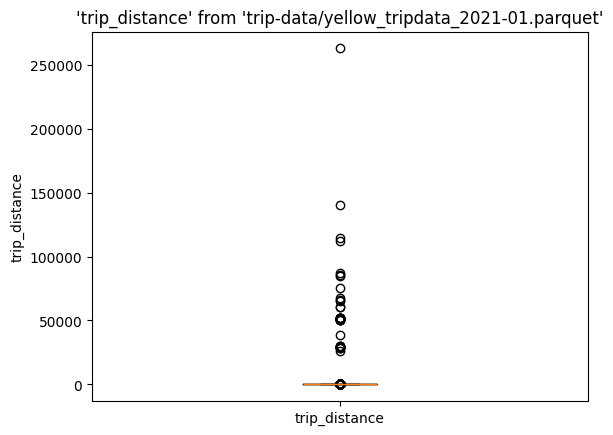

In [11]:
%sqlplot boxplot --table trip-data/yellow_tripdata_2021-01.parquet --column trip_distance

CatalogException: Catalog Error: Table with name com/nergir/one/raw/refs/heads/main/trip-data/yellow_tripdata_2021-01 does not exist!
Did you mean "information_schema.referential_constraints"?
LINE 6:     FROM "https://github"."com/nergir/one/raw/refs/heads/main/trip-data/yellow_tripdata_2021-01"...
                 ^

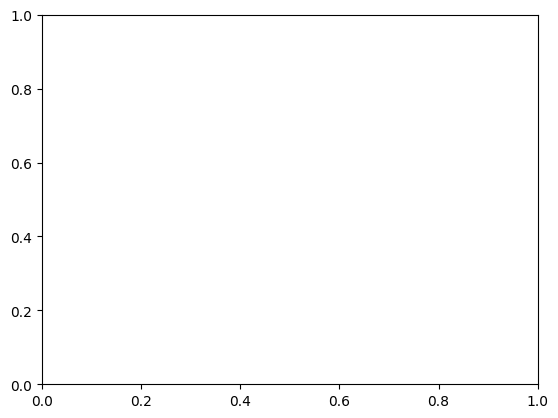

In [12]:
%sqlplot boxplot --table https://github.com/nergir/one/raw/refs/heads/main/trip-data/yellow_tripdata_2021-01.parquet --column trip_distance

In [13]:
%%sql --save short_trips --no-execute
SELECT *
FROM 'trip-data/yellow_tripdata_2021-01.parquet'
WHERE trip_distance < 6.3

Running query in 'duckdb'

Skipping execution...

<Axes: title={'center': "'trip_distance' from 'short_trips'"}, xlabel='trip_distance', ylabel='Count'>

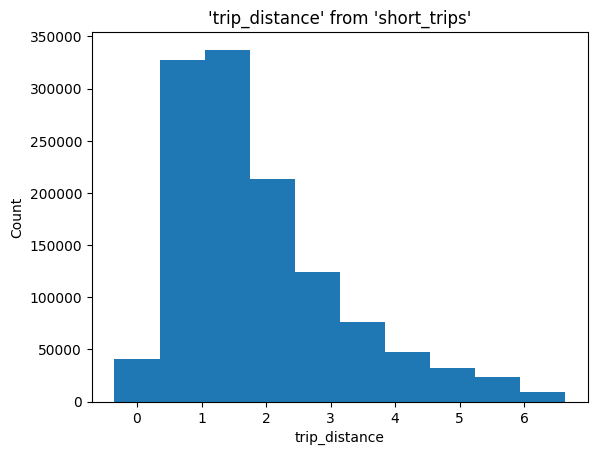

In [14]:
%sqlplot histogram --table short_trips --column trip_distance --bins 10 --with short_trips

In [ ]:
import pandas as pd

# Create a sample DataFrame
data = {
    "Date": ["2024-01-01", "2024-01-01", "2024-01-02", "2024-01-02", "2024-01-03", "2024-01-03"],
    "Region": ["East", "West", "East", "West", "East", "West"],
    "Product": ["A", "A", "B", "B", "A", "B"],
    "Sales": [100, 150, 200, 250, 300, 350],
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)


Original DataFrame:
         Date Region Product  Sales
0  2024-01-01   East       A    100
1  2024-01-01   West       A    150
2  2024-01-02   East       B    200
3  2024-01-02   West       B    250
4  2024-01-03   East       A    300
5  2024-01-03   West       B    350


In [ ]:
# Pivot the DataFrame
pivot_df = df.pivot(index="Date", columns="Region", values="Sales")
print("\nPivoted DataFrame:")
print(pivot_df)



Pivoted DataFrame:
Region      East  West
Date                  
2024-01-01   100   150
2024-01-02   200   250
2024-01-03   300   350


In [ ]:
# Pivot table with aggregation
pivot_table_df = df.pivot_table(index="Date", columns="Product", values="Sales", aggfunc="sum")
print("\nPivot Table with Aggregation:")
print(pivot_table_df)


Pivot Table with Aggregation:
Product         A      B
Date                    
2024-01-01  250.0    NaN
2024-01-02    NaN  450.0
2024-01-03  300.0  350.0


In [ ]:
# Convert the DataFrame into DuckDB and run a pivot query
pivot_query = """
SELECT
    Date,
    SUM(CASE WHEN Region = 'East' THEN Sales ELSE 0 END) AS East,
    SUM(CASE WHEN Region = 'West' THEN Sales ELSE 0 END) AS West
FROM df
GROUP BY Date
ORDER BY Date;
"""

# Execute the query
pivoted_df = duckdb.query(pivot_query).to_df()
print("\nPivoted DataFrame using DuckDB:")
print(pivoted_df)



Pivoted DataFrame using DuckDB:
         Date   East   West
0  2024-01-01  100.0  150.0
1  2024-01-02  200.0  250.0
2  2024-01-03  300.0  350.0


In [ ]:
pivot_query_multi = """
SELECT
    Date,
    SUM(CASE WHEN Region = 'East' AND Product = 'A' THEN Sales ELSE 0 END) AS East_A,
    SUM(CASE WHEN Region = 'West' AND Product = 'A' THEN Sales ELSE 0 END) AS West_A,
    SUM(CASE WHEN Region = 'East' AND Product = 'B' THEN Sales ELSE 0 END) AS East_B,
    SUM(CASE WHEN Region = 'West' AND Product = 'B' THEN Sales ELSE 0 END) AS West_B
FROM df
GROUP BY Date
ORDER BY Date;
"""

# Execute the query
pivoted_df_multi = duckdb.query(pivot_query_multi).to_df()
print("\nPivoted DataFrame with Multiple Dimensions using DuckDB:")
print(pivoted_df_multi)



Pivoted DataFrame with Multiple Dimensions using DuckDB:
         Date  East_A  West_A  East_B  West_B
0  2024-01-01   100.0   150.0     0.0     0.0
1  2024-01-02     0.0     0.0   200.0   250.0
2  2024-01-03   300.0     0.0     0.0   350.0


In [ ]:
import duckdb
import pandas as pd

# Sample DataFrame
data = {
    "Date": ["2024-01-01", "2024-01-01", "2024-01-02", "2024-01-02", "2024-01-03", "2024-01-03"],
    "Region": ["East", "West", "East", "West", "East", "West"],
    "Product": ["A", "A", "B", "B", "A", "B"],
    "Sales": [100, 150, 200, 250, 300, 350],
}

df = pd.DataFrame(data)


# Function to dynamically generate pivot query
def generate_pivot_query(df, index, pivot_columns, value_column):
    unique_values = {col: df[col].unique() for col in pivot_columns}

    # Generate CASE statements for each combination of pivot columns
    cases = []
    for region in unique_values["Region"]:
        for product in unique_values["Product"]:
            col_name = f"{region}_{product}"
            cases.append(
                f"SUM(CASE WHEN Region = '{region}' AND Product = '{product}' THEN {value_column} ELSE 0 END) AS {col_name}"
            )

    # Construct the final query string
    query = f"""
    SELECT
        {index},
        {', '.join(cases)}
    FROM df
    GROUP BY {index}
    ORDER BY {index};
    """
    return query


# Generate and execute the query
query = generate_pivot_query(df, index="Date", pivot_columns=["Region", "Product"], value_column="Sales")
pivoted_df = duckdb.query(query).to_df()
print("\nPivoted DataFrame:")
print(pivoted_df)



Pivoted DataFrame:
         Date  East_A  East_B  West_A  West_B
0  2024-01-01   100.0     0.0   150.0     0.0
1  2024-01-02     0.0   200.0     0.0   250.0
2  2024-01-03   300.0     0.0     0.0   350.0


In [29]:
!INSTALL sqlite;

'INSTALL' is not recognized as an internal or external command,
operable program or batch file.


In [30]:
%SELECT * FROM sqlite_scan('test.db', 'tbl_name');

UsageError: Line magic function `%SELECT` not found.


In [31]:
ATTACH 'sakila.db' (TYPE SQLITE);
USE sakila;

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2773939762.py, line 1)